### EJERCICIO 2:
#### Obtener el error estandar de la correlacion y mostrar para que N la precisión con respecto a la correlación de la muestra total es mejor. De la base data_schools obtener el error estándar con Bootstrap de las correlacion de las variables de la base. 
##### - Recordemos que tienen que simular N Muestras Boostrap con tamño n=15.
##### - Grafique los histogramas de las correlaciones
##### - Grafique el  histograma pero sobre una muestra bostrap considerando la muestra completa

In [81]:
#Importamos las librerias a utilizar
import pandas as pd
import os
from scipy.stats import spearmanr
import numpy as np
import matplotlib.pyplot as plt

Ahora, establecemos la ruta donde tenemos nuestras bases

In [82]:
# Antes que nada obtenemos el directorio en el que estamos trabajando
os.getcwd()
# como no es el directorio en donde tenemos guardados los archivos, procedemos a actualizar
os.chdir("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/")

Leemos el archivo "data_schools.xlsx" 

In [83]:
escuelas=pd.read_excel("data_schools.xlsx")
escuelas

,escuela,LSAT,GPA
0,1,622,3.23
1,2,542,2.83
2,3,579,3.24
3,4,653,3.12
4,5,606,3.09
...,...,...,...
77,78,590,3.15
78,79,558,2.81
79,80,611,3.16
80,81,564,3.02


In [84]:
escuelas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   escuela  82 non-null     int64  
 1   LSAT     82 non-null     int64  
 2   GPA      82 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.0 KB


Ahora, calcularemos la correlacion entre las variables de la base completa.

In [85]:
corr, _ = spearmanr(escuelas.LSAT, escuelas.GPA)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.753


In [86]:
# Creamos un vector de 3200 0's esto es debido a que se recomienda un total de 3200 simulaciones
vector = np.zeros(3200)

In [87]:
#creamos el cilclo for para el llenado de las 3200 correlaciones a calcular
for i in range(3200):
#Seleccionamos aleatoriamente 15 escuelas
    muestraboot = escuelas.sample(n=15,replace=True)[["escuela"]]
# unimos la base completa con el vector aleatorio de escuelas mediante un inner para que solo nos devuelva
# la tabla interseccion, es decir, solo los valores seleccionados en la muestra aleatoria.
    muestraboot = pd.merge(muestraboot, escuelas, how='inner', on=["escuela"], sort=True)
#calculamos la correlacion entre las variables de la muestra 
    aux, _ = spearmanr(muestraboot.LSAT, muestraboot.GPA)
# y la guardamos en nuestro vector de correlaciones
    vector[i]=aux

(array([  1.,   0.,   0.,   0.,   1.,   4.,   4.,  10.,  28.,  55., 102.,
        201., 316., 470., 742., 707., 465.,  94.]),
 array([-0.18962433, -0.12492298, -0.06022163,  0.00447973,  0.06918108,
         0.13388243,  0.19858378,  0.26328513,  0.32798648,  0.39268784,
         0.45738919,  0.52209054,  0.58679189,  0.65149324,  0.71619459,
         0.78089595,  0.8455973 ,  0.91029865,  0.975     ]),
 <BarContainer object of 18 artists>)

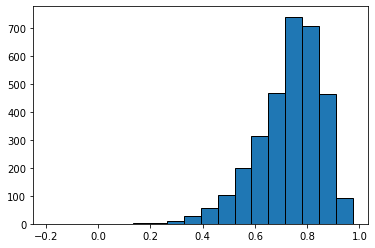

In [88]:
#Graficamos las correlaciones obtenidas a traves del metodo bootstrap
plt.hist(vector,18,ec="black")

In [89]:
# Pero, Cual es la media de las simulaciones?
media3200 = np.mean(vector)
media3200

0.7329346154834994

Recordemos que para los datos de la base completa teniamos una correlacion de 0.753 por lo que en comparacion con las simulaciones bootstrap, en donde obtenemos una correlacion de 0.7331, el numero de 3200 simulaciones parece adecuado.
Veamos que ocurre si aumentamos el numero de simulaciones a 4000

In [123]:
# Creamos un vector de 4000 0's 
vector2 = np.zeros(4000)
#creamos el cilclo for para el llenado de las 3200 correlaciones a calcular
for i in range(4000):
#Seleccionamos aleatoriamente 15 escuelas
    muestraboot = escuelas.sample(n=15,replace=True)[["escuela"]]
# unimos la base completa con el vector aleatorio de escuelas mediante un inner para que solo nos devuelva
# la tabla interseccion, es decir, solo los valores seleccionados en la muestra aleatoria.
    muestraboot = pd.merge(muestraboot, escuelas, how='inner', on=["escuela"], sort=True)
#calculamos la correlacion entre las variables de la muestra 
    aux, _ = spearmanr(muestraboot.LSAT, muestraboot.GPA)
# y la guardamos en nuestro vector de correlaciones
    vector2[i]=aux

(array([  1.,   1.,   5.,   8.,  14.,  44.,  80., 138., 249., 391., 558.,
        661., 672., 589., 372., 168.,  43.,   6.]),
 array([0.48536388, 0.50833552, 0.53130715, 0.55427878, 0.57725041,
        0.60022205, 0.62319368, 0.64616531, 0.66913695, 0.69210858,
        0.71508021, 0.73805184, 0.76102348, 0.78399511, 0.80696674,
        0.82993838, 0.85291001, 0.87588164, 0.89885328]),
 <BarContainer object of 18 artists>)

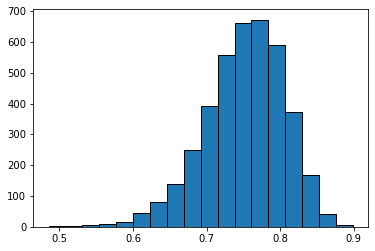

In [126]:
#Graficamos las correlaciones obtenidas a traves del metodo bootstrap
plt.hist(vector2,18,ec="black")

In [107]:
# Pero, Cual es la media de las simulaciones?
media4000 = np.mean(vector2)
media4000

0.728672469067507

Notemos que el aumento en la precision para la media no resulta significante desde el punto de vista computacional, pues nos resulta mas costoso y las estimaciones son similares. 
Razon por la cual, nos quedamos con las 3200 simulaciones recomendadas para la aplicacion de bootstrap. Sin embargo, nuestro objetivo es comparar la precision mediante el analisis del error estandar, por lo que procedemos al calculo para ambos numeros de simulaciones.

In [93]:
# Calcularemos primero la desviacion estandar para asi poder calcular el error estandar de la estimacion de la correlacion
# Para las 3200 simulacions
# Restamos a cada correlacion simulada la media de las 3200 correlaciones
for i in range(len(vector)):
    vector[i]=vector[i]-media3200
# Elevamos las restas al cuadrado  
for i in range(len(vector)):
    vector[i]=vector[i]*vector[i]
# Convertimos el vector en un objeto de numpy para poder sumar sus entradas y dividir entre n-1
vector = np.array(vector)
# Calculamos la desviacion estandar
sd3200 = pow((vector.sum()/(len(vector)-1)),0.5)
sd3200

0.12511379480725535

In [94]:
# Y finalmente el error estandar para N = 3200 simulaciones, que no es mas que la desviacion entre la raiz del numero 
# de simulaciones
SE3200 = sd3200/pow(3200,0.5)
SE3200

0.0022117203182048127

Ahora, que pasa cuando hacemos 4000 simulaciones?

In [108]:
# Calcularemos primero la desviacion estandar para asi poder calcular el error estandar de la estimacion de la correlacion
# Para las 4000 simulacions
# Restamos a cada correlacion simulada la media de las 4000 correlaciones
for i in range(len(vector)):
    vector2[i]=vector2[i]-media4000
# Elevamos las restas al cuadrado  
for i in range(len(vector)):
    vector2[i]=vector2[i]*vector2[i]
# Convertimos el vector en un objeto de numpy para poder sumar sus entradas y dividir entre n-1
vector2 = np.array(vector2)
# Calculamos la desviacion estandar
sd4000 = pow((vector2.sum()/(len(vector2)-1)),0.5)
sd4000

0.3996129522303085

In [124]:
# Y finalmente el error estandar para N = 4000 simulaciones, que no es mas que la desviacion entre la raiz del numero 
# de simulaciones
SE4000 = sd4000/pow(4000,0.5)
SE4000

0.006318435557759192

Entonces:
Como sabemos, un valor del error estándar de la media de la correlacion más bajo indica una estimación más precisa de la media del estimador, mientras que una desviación estándar más grande se traducirá en un mayor error estándar de la media y una estimación menos precisa de la media de la correlacion, por lo que en este caso, notamos que el error estandar para las 3200 simulaciones es menor al de las 4000.

#### Y en conclucion, el estimador bootstrap para una N=3200 simulaciones, es mas preciso.

### Ahora bien, que ocurrira si hacemos un remuestreo bootstrap para n = 82. 

In [112]:
escuelas=pd.read_excel("data_schools.xlsx")
# Creamos un vector de 3200 0's esto es debido a que se recomienda un total de 3200 simulaciones
vector = np.zeros(3200)
#creamos el cilclo for para el llenado de las 3200 correlaciones a calcular
for i in range(3200):
#Seleccionamos aleatoriamente 82 escuelas con reemplazo
    muestraboot = escuelas.sample(n=82,replace=True)[["escuela"]]
# unimos la base completa con el vector aleatorio de escuelas mediante un inner para que solo nos devuelva
# la tabla interseccion, es decir, solo los valores seleccionados en la muestra aleatoria.
    muestraboot = pd.merge(muestraboot, escuelas, how='inner', on=["escuela"], sort=True)
#calculamos la correlacion entre las variables de la muestra 
    aux, _ = spearmanr(muestraboot.LSAT, muestraboot.GPA)
# y la guardamos en nuestro vector de correlaciones
    vector[i]=aux

(array([  1.,   3.,   5.,  11.,  47., 104., 183., 330., 489., 666., 626.,
        451., 224.,  52.,   8.]),
 array([0.49102928, 0.51848173, 0.54593418, 0.57338663, 0.60083908,
        0.62829153, 0.65574398, 0.68319643, 0.71064888, 0.73810133,
        0.76555378, 0.79300623, 0.82045868, 0.84791113, 0.87536358,
        0.90281603]),
 <BarContainer object of 15 artists>)

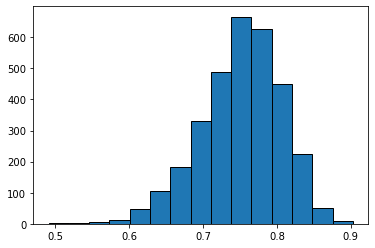

In [115]:
#Graficamos las correlaciones obtenidas a traves del metodo bootstrap
plt.hist(vector,15,ec="black")

In [114]:
# Pero, Cual es la media de las simulaciones?
media3200 = np.mean(vector)
media3200

0.7516728765696925

In [116]:
# Calcularemos primero la desviacion estandar para asi poder calcular el error estandar de la estimacion de la correlacion
# Para las 3200 simulacions
# Restamos a cada correlacion simulada la media de las 3200 correlaciones
for i in range(len(vector)):
    vector[i]=vector[i]-media3200
# Elevamos las restas al cuadrado  
for i in range(len(vector)):
    vector[i]=vector[i]*vector[i]
# Convertimos el vector en un objeto de numpy para poder sumar sus entradas y dividir entre n-1
vector = np.array(vector)
# Calculamos la desviacion estandar
sd3200 = pow((vector.sum()/(len(vector)-1)),0.5)
sd3200

0.0538761891163579

In [117]:
# Y finalmente el error estandar para N = 3200 simulaciones, que no es mas que la desviacion entre la raiz del numero 
# de simulaciones
SE3200 = sd3200/pow(3200,0.5)
SE3200

0.0009524054667166385

Mientras que para 4000 simulaciones:

In [137]:
# Creamos un vector de 4000 0's 
vector2 = np.zeros(4000)
#creamos el cilclo for para el llenado de las 3200 correlaciones a calcular
for i in range(4000):
#Seleccionamos aleatoriamente 15 escuelas
    muestraboot = escuelas.sample(n=82,replace=True)[["escuela"]]
# unimos la base completa con el vector aleatorio de escuelas mediante un inner para que solo nos devuelva
# la tabla interseccion, es decir, solo los valores seleccionados en la muestra aleatoria.
    muestraboot = pd.merge(muestraboot, escuelas, how='inner', on=["escuela"], sort=True)
#calculamos la correlacion entre las variables de la muestra 
    aux, _ = spearmanr(muestraboot.LSAT, muestraboot.GPA)
# y la guardamos en nuestro vector de correlaciones
    vector2[i]=aux

(array([   3.,    5.,   46.,  115.,  383.,  750., 1172., 1043.,  423.,
          60.]),
 array([0.49082133, 0.53095402, 0.57108671, 0.6112194 , 0.65135209,
        0.69148478, 0.73161748, 0.77175017, 0.81188286, 0.85201555,
        0.89214824]),
 <BarContainer object of 10 artists>)

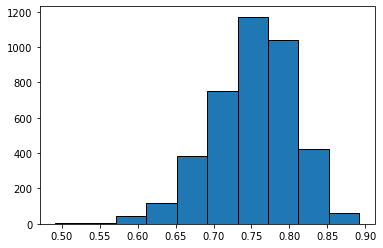

In [138]:
#Graficamos las correlaciones obtenidas a traves del metodo bootstrap
plt.hist(vector2,10,ec="black")

In [139]:
# Pero, Cual es la media de las simulaciones?
media4000 = np.mean(vector2)
media4000

0.7519281623268328

In [140]:
# Calcularemos primero la desviacion estandar para asi poder calcular el error estandar de la estimacion de la correlacion
# Para las 4000 simulacions
# Restamos a cada correlacion simulada la media de las 4000 correlaciones
for i in range(len(vector)):
    vector2[i]=vector2[i]-media4000
# Elevamos las restas al cuadrado  
for i in range(len(vector)):
    vector2[i]=vector2[i]*vector2[i]
# Convertimos el vector en un objeto de numpy para poder sumar sus entradas y dividir entre n-1
vector2 = np.array(vector2)
# Calculamos la desviacion estandar
sd4000 = pow((vector2.sum()/(len(vector2)-1)),0.5)
sd4000

0.39111957697102523

In [141]:
# Y finalmente el error estandar para N = 4000 simulaciones, que no es mas que la desviacion entre la raiz del numero 
# de simulaciones
SE4000 = sd4000/pow(4000,0.5)
SE4000

0.0061841435035499

Nuevamente,notamos que el error estandar para las 3200 simulaciones es menor al de las 4000. Y en conclusión, el estimador bootstrap para una N=3200 simulaciones, es mas preciso.
Sin embargo, hemos de notar que cuando utilizamos un remuestreo con la misma cantidad del numero de observaciones, la estimacion de la media del estimador de la correlacion se vuelve mas preciso, en ambos casos acercandose a 0.753 que es el verdadero valor de la correlación de nuestra muestra de escuelas. 

#### En conclusión, es preferible realizar un numero de 3200 simulaciones tomando un remuestreo de un tamaño igual a la muestra o cuanto menos aproximado. Sin embargo, cabe mencionar que cuando el tamaño del remuestreo fue inferior, con n=15 también obteníamos una buena precisión para estimar la media de la correlación. Notemos así, que una disminucion en el tamaño del remuestreo implica un aumento en el error estandar del estimador, por lo que conforme aumenta el tamaño del remuestreo, ganaremos una mayor precisión en el cálculo de nuestros estimadores.